In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.shape

(200, 4)

In [6]:
df.size

800

In [7]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
#correlation
cor=df.corr(numeric_only=True)
cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

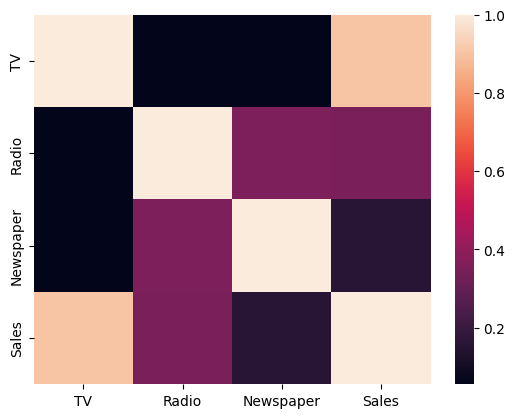

In [12]:
sns.heatmap(cor)

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [15]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

<Axes: xlabel='TV', ylabel='Sales'>

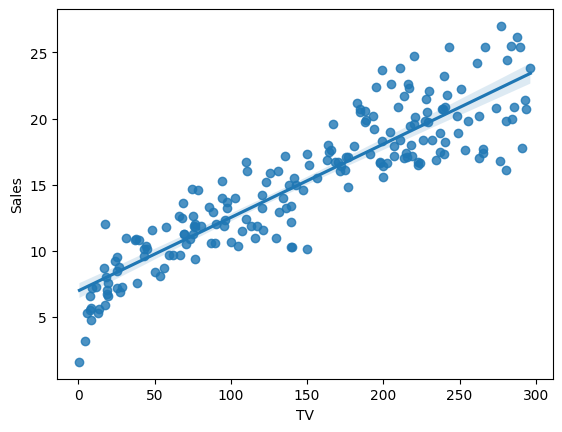

In [16]:
#regplot
#TV vs Sales
sns.regplot(x=df['TV'],y=y)

<Axes: xlabel='Radio', ylabel='Sales'>

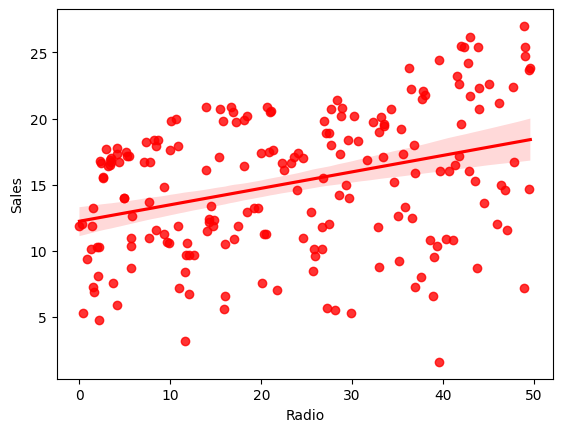

In [17]:
#Radio vs Sales
sns.regplot(x=df['Radio'],y=y,color='r')

<Axes: xlabel='Newspaper', ylabel='Sales'>

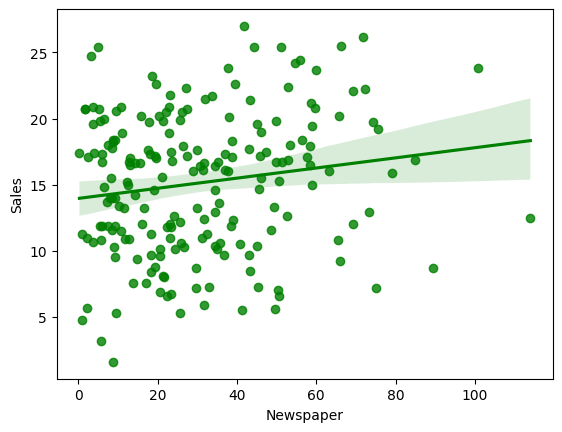

In [18]:
#Newspaper vs Sales
sns.regplot(x=df['Newspaper'],y=y,color='g')

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.30,random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([21.69376386, 17.67437126,  9.61385802, 20.14994725, 20.20137656,
       24.1454348 , 16.68478406, 14.74924188,  9.939377  , 18.25355919,
       15.37006935, 10.69408066, 18.80658527, 16.10892326, 16.74038207,
       15.19256799, 13.47247554, 20.0174525 , 11.0112793 , 19.28324071,
       10.99120966, 11.81961783,  8.86636412, 11.86782475, 12.32946993,
       16.44547836, 10.01009381, 20.79052033, 18.74926435, 18.95058218,
       22.30220104, 16.26394152, 16.98743178, 14.03321192, 21.21062399,
       16.6889942 , 16.35658215, 11.68775475, 21.34542315,  8.09639399,
        5.0397065 ,  9.03556329,  6.9157311 , 19.03112948,  8.28875211,
       15.16746678, 14.51484887, 21.04539185, 20.973556  , 19.978581  ,
       24.64994898, 15.41830984,  7.48458827, 19.57516875, 20.93258613,
       14.26625974, 16.28019952,  7.03041121, 17.59634121, 10.0437981 ,
       13.40054167, 13.58633994,  8.75137712, 23.39133017, 23.81484143,
       10.80798866,  8.60945417, 17.29439013, 17.89530577,  9.45

In [21]:
y_test

58     23.8
40     16.6
34     11.9
102    19.8
184    17.6
       ... 
23     20.5
126     6.6
9      15.6
170     8.4
104    20.7
Name: Sales, Length: 140, dtype: float64

In [22]:
#DataFrame
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
58,23.8,21.693764,2.106236
40,16.6,17.674371,-1.074371
34,11.9,9.613858,2.286142
102,19.8,20.149947,-0.349947
184,17.6,20.201377,-2.601377
...,...,...,...
23,20.5,18.336008,2.163992
126,6.6,9.667518,-3.067518
9,15.6,15.003453,0.596547
170,8.4,8.512492,-0.112492


In [24]:
print(model.coef_)

[ 0.05155567  0.13378883 -0.00999253]


In [25]:
print(model.intercept_)

4.566620372921777


In [27]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
print('MAE ',mean_absolute_error(y_test,y_pred))
print('MAPE ',mean_absolute_percentage_error(y_test,y_pred))
print('MSE ',mean_squared_error(y_test,y_pred))
print('RMSE ',root_mean_squared_error(y_test,y_pred))
print('R2 ',r2_score(y_test,y_pred))

MAE  1.4302944053261406
MAPE  0.1446078601175125
MSE  3.6187520559394613
RMSE  1.9023017783568046
R2  0.8694695794472193
